In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 정규화는 StandardScaler로
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from autogluon.tabular import TabularDataset, TabularPredictor
import joblib # 모델 저장
from sklearn.metrics import accuracy_score
# AuntoML인 pycaret 사용해서 적절한 모델 비교
from pycaret.regression import *
# 스탠다드스케일러 모델 저장모듈
import pickle

In [31]:
DC_df = pd.read_csv('UNGK_DC.csv', encoding='utf-16', index_col=0)
DC_df

,player_nm,player_overall,player_potential,player_team,player_country,player_position,player_age,player_foot,player_height,player_Weight,...,vision,work-rate,acceleration,agility,balance,jumping-reach,natural-fitness,pace,stamina,strength
8,Virgil van Dijk,89,92.0,Liverpool,Netherlands,DC,32,Right,193,92,...,14,15,15,12,15,17,17,15,15,17
17,Rúben Dias,87,89.0,Manchester City,Portugal,DC,26,Right,186,83,...,13,17,13,13,12,16,18,13,18,16
23,Ronald Araujo,85,88.0,FC Barcelona,Uruguay,DC,24,Right,188,91,...,11,17,14,13,12,16,15,16,16,16
32,John Stones,83,85.0,Manchester City,England,DC,29,Right,188,72,...,14,17,14,13,12,16,16,15,16,15
33,Éder Militão,83,84.0,Real Madrid,Brazil,DC,25,Right,186,78,...,12,16,16,15,15,15,18,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23561,Ásgeir Eyþórsson,50,54.0,Fylkir,Others,DC,30,Left,192,80,...,11,10,14,13,10,13,12,13,10,9
23566,Cameron Borthwick-Jackson,50,68.0,Śląsk,Others,DC,26,Left,189,78,...,10,12,12,12,11,11,12,12,13,11
23567,Łukasz Bejger,50,68.0,Śląsk,Others,DC,21,Right,190,76,...,4,12,11,10,9,15,14,13,12,12
23568,Ilja Vakhania,50,60.0,FK Rostov,Russia,DC,22,Right,180,68,...,12,13,12,11,12,9,16,12,12,7


In [32]:
# 결측치 확인 - 없음
DC_df.isna().sum()

player_nm           0
player_overall      0
player_potential    0
player_team         6
player_country      0
player_position     0
player_age          0
player_foot         0
player_height       0
player_Weight       0
corners             0
crossing            0
dribbling           0
finishing           0
first-touch         0
free-kick-taking    0
heading             0
long-shots          0
long-throws         0
marking             0
passing             0
penalty-taking      0
tackling            0
technique           0
aggression          0
anticipation        0
bravery             0
composure           0
concentration       0
decisions           0
determination       0
flair               0
leadership          0
off-the-ball        0
positioning         0
teamwork            0
vision              0
work-rate           0
acceleration        0
agility             0
balance             0
jumping-reach       0
natural-fitness     0
pace                0
stamina             0
strength  

In [33]:
#DC_df = DC_df.drop(['player_nm', 'player_team', 'player_country', 'player_position', 'player_foot'], axis=1)


In [34]:
#corr_matrix = DC_df.corr()
#relevant_rows = corr_matrix[corr_matrix['player_overall'] >= 0.3]
#상관 관계값을 기준으로 내림차순 정렬
#sorted_relevant_rows = relevant_rows.sort_values(by='player_overall', ascending=False)

#결과 출력

#print(sorted_relevant_rows[['player_overall']])

In [35]:
DC_df.columns

Index(['player_nm', 'player_overall', 'player_potential', 'player_team',
       'player_country', 'player_position', 'player_age', 'player_foot',
       'player_height', 'player_Weight', 'corners', 'crossing', 'dribbling',
       'finishing', 'first-touch', 'free-kick-taking', 'heading', 'long-shots',
       'long-throws', 'marking', 'passing', 'penalty-taking', 'tackling',
       'technique', 'aggression', 'anticipation', 'bravery', 'composure',
       'concentration', 'decisions', 'determination', 'flair', 'leadership',
       'off-the-ball', 'positioning', 'teamwork', 'vision', 'work-rate',
       'acceleration', 'agility', 'balance', 'jumping-reach',
       'natural-fitness', 'pace', 'stamina', 'strength'],
      dtype='object')

In [36]:
# nongk['player_foot'] 양발은 왼발에 포함, 오른발을 1로 왼발을 2로 바꾸기
#DC_df['player_foot'] = DC_df['player_foot'].replace('Both', 'Left')
#DC_df['player_foot'] = DC_df['player_foot'].replace('Right', 1)
#DC_df['player_foot'] = DC_df['player_foot'].replace('Left', 2)
#DC_df.reset_index(drop=True, inplace=True)

In [37]:
# R2 0.6499
#DC = pd.DataFrame(DC_df[['passing', 'bravery', 'anticipation','teamwork', 'stamina', 'technique', 'concentration', 'work-rate', 'first-touch','composure']])
#DC.reset_index(drop=True, inplace=True)

# R2 0.6469
DC = pd.DataFrame(DC_df[['player_age','passing', 'bravery', 'anticipation','teamwork', 'stamina', 'technique', 'concentration', 'work-rate','composure']])
DC.reset_index(drop=True, inplace=True)


#R2 0.6412
# DC = pd.DataFrame(DC_df[['determination', 'bravery', 'anticipation','teamwork', 'pace', 'marking', 'tackling', 'work-rate', 'aggression','composure']])
# DC.reset_index(drop=True, inplace=True)

# R2 0.5256
# DC = pd.DataFrame(DC_df[['player_age', 'player_foot', 'composure','teamwork', 'anticipation', 'marking', 'tackling', 'decisions', 'aggression','concentration']])
# DC.reset_index(drop=True, inplace=True)



# R2 0.45
# DC = pd.DataFrame(DC_df[['player_age', 'player_foot', 'player_height', 'player_Weight', 'anticipation', 'marking', 'tackling', 'decisions', 'aggression','concentration']])
# DC.reset_index(drop=True, inplace=True)


# 챗봇에 물어본 상관관계가 높은 칼럼 6개와 나이, 키, 몸무게, 주발로 데이터프레임 만들기 -- R2 0.5
#DC = pd.DataFrame(DC_df[['player_age', 'player_foot', 'player_height', 'player_Weight', 'anticipation', 'marking', 'tackling', 'composure', 'positioning','teamwork']])
#DC.reset_index(drop=True, inplace=True)

In [38]:
# 이상치 평균값으로 바꾸기 - 나이
#player_mean_age = np.mean(DC['player_age'])

#DC['player_age'] = np.where(DC['player_age'] >= 40, player_mean_age, DC['player_age'])

In [39]:
DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   player_age     8750 non-null   int64
 1   passing        8750 non-null   int64
 2   bravery        8750 non-null   int64
 3   anticipation   8750 non-null   int64
 4   teamwork       8750 non-null   int64
 5   stamina        8750 non-null   int64
 6   technique      8750 non-null   int64
 7   concentration  8750 non-null   int64
 8   work-rate      8750 non-null   int64
 9   composure      8750 non-null   int64
dtypes: int64(10)
memory usage: 683.7 KB


In [40]:
# 이상치 평균값으로 바꾸기 - 키
#player_mean_height = np.mean(DC['player_height'])
#DC['player_height'] = np.where((DC['player_height'] >= 200) | (DC['player_height'] <= 165), player_mean_height, DC['player_height'])

In [41]:
# 이상치 평균값으로 바꾸기 - 몸무게
#player_mean_weight = np.mean(DC['player_Weight'])
#DC['player_Weight'] = np.where((DC['player_Weight'] >= 95) | (DC['player_Weight'] <= 58), player_mean_weight, DC['player_Weight'])

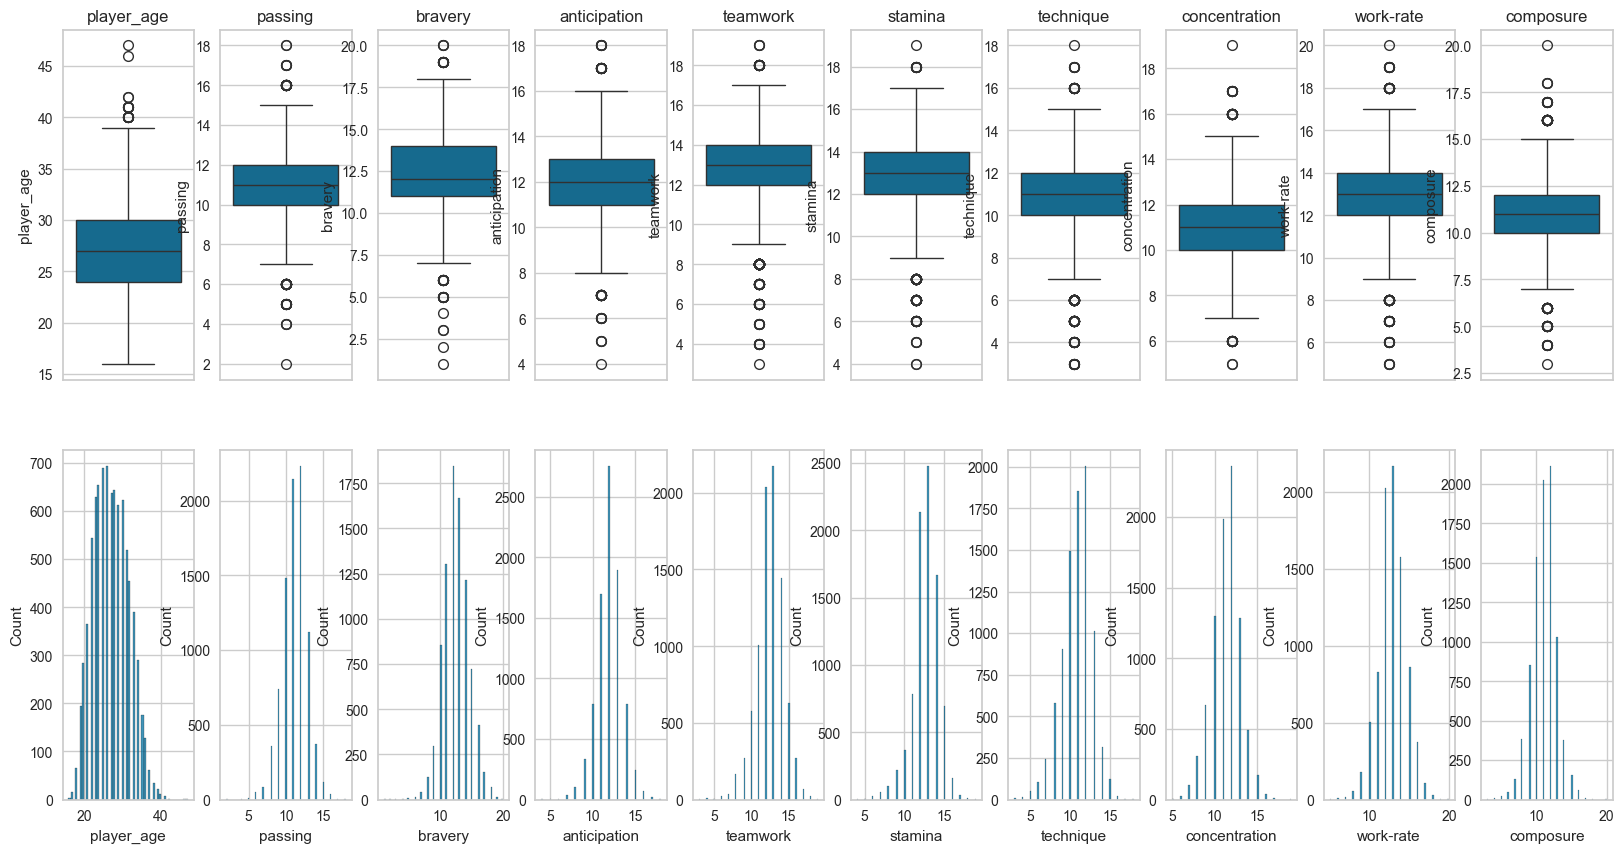

<Figure size 800x550 with 0 Axes>

In [42]:
f,axes = plt.subplots(2, 10, figsize=(20,10))
for i in range(len(DC.columns)):
    sns.boxplot(data=DC[DC.columns[i]], ax= axes[0][i])
    sns.histplot(data=DC[DC.columns[i]], ax= axes[1][i])
    axes[0][i].set_title(DC.columns[i])  # 각 그래프의 제목을 열의 이름으로 설정
    axes[1][i].set_title('')  # 히스토그램의 제목을 비움 (선택 사항)
plt.show()
plt.tight_layout()

In [43]:
ss = StandardScaler()
ss_DC_fit = ss.fit(DC)
ss_DC = ss_DC_fit.transform(DC)
ss_DC = pd.DataFrame(ss_DC, columns=DC.columns)
ss_DC


,player_age,passing,bravery,anticipation,teamwork,stamina,technique,concentration,work-rate,composure
0,1.096472,2.929407,1.222444,2.671049,1.900948,1.418040,2.713253,2.804227,1.237526,3.360795
1,-0.242929,1.714289,2.691190,3.332500,1.900948,3.231347,1.136234,2.198256,2.388622,2.220084
2,-0.689396,-0.108389,2.691190,2.671049,1.356130,2.022476,0.610561,3.410198,2.388622,2.220084
3,0.426771,2.929407,2.201608,2.671049,1.900948,2.022476,2.713253,2.804227,2.388622,3.931151
4,-0.466162,1.714289,1.712026,2.671049,0.811312,2.022476,0.610561,0.986313,1.813074,1.079373
...,...,...,...,...,...,...,...,...,...,...
8745,0.650005,-0.715948,-1.225466,0.686699,-1.367961,-1.604137,0.084889,-0.831600,-1.640213,-0.061338
8746,-0.242929,-0.108389,-1.715047,-0.636202,-0.823142,0.209169,0.610561,-0.831600,-0.489117,0.509018
8747,-1.359096,-0.715948,-1.715047,0.025248,-0.278324,-0.395266,0.610561,-0.225629,-0.489117,-0.061338
8748,-1.135863,-0.715948,-2.204629,-0.636202,0.811312,-0.395266,-1.492130,-0.831600,0.086431,-0.061338


In [44]:
# 스탠다드 스케일러 모델 저장
with open('ss_DC_model.pkl', 'wb') as f:
    pickle.dump(ss_DC_fit, f)

In [45]:
DC_df.reset_index(drop=True, inplace=True)

In [46]:
# 머신러닝인 pycaret으로 player_overall값을 예측하기 위해 타겟값인 실제 player_overall값을 ss_DC 데이터프레임에 붙여줌
ss_DC['player_overall'] = DC_df['player_overall']

In [47]:
ss_DC

,player_age,passing,bravery,anticipation,teamwork,stamina,technique,concentration,work-rate,composure,player_overall
0,1.096472,2.929407,1.222444,2.671049,1.900948,1.418040,2.713253,2.804227,1.237526,3.360795,89
1,-0.242929,1.714289,2.691190,3.332500,1.900948,3.231347,1.136234,2.198256,2.388622,2.220084,87
2,-0.689396,-0.108389,2.691190,2.671049,1.356130,2.022476,0.610561,3.410198,2.388622,2.220084,85
3,0.426771,2.929407,2.201608,2.671049,1.900948,2.022476,2.713253,2.804227,2.388622,3.931151,83
4,-0.466162,1.714289,1.712026,2.671049,0.811312,2.022476,0.610561,0.986313,1.813074,1.079373,83
...,...,...,...,...,...,...,...,...,...,...,...
8745,0.650005,-0.715948,-1.225466,0.686699,-1.367961,-1.604137,0.084889,-0.831600,-1.640213,-0.061338,50
8746,-0.242929,-0.108389,-1.715047,-0.636202,-0.823142,0.209169,0.610561,-0.831600,-0.489117,0.509018,50
8747,-1.359096,-0.715948,-1.715047,0.025248,-0.278324,-0.395266,0.610561,-0.225629,-0.489117,-0.061338,50
8748,-1.135863,-0.715948,-2.204629,-0.636202,0.811312,-0.395266,-1.492130,-0.831600,0.086431,-0.061338,50


In [48]:
# pycaret을 이용해서 최적의 모델 구하기
X_train, X_test = train_test_split(ss_DC, train_size = 0.7, random_state =123)
Overall_df = setup(data = X_train, target = 'player_overall',test_data = X_test, session_id = 123)

,Description,Value
0,Session id,123
1,Target,player_overall
2,Target type,Regression
3,Original data shape,"(8750, 11)"
4,Transformed data shape,"(8750, 11)"
5,Transformed train set shape,"(6125, 11)"
6,Transformed test set shape,"(2625, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [49]:
best = compare_models(n_select=30, sort='RMSE')
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.4965,10.5411,3.2441,0.6469,0.0550,0.0436,0.1510
gbr,Gradient Boosting Regressor,2.5151,10.6736,3.2643,0.6423,0.0552,0.0439,0.0590
et,Extra Trees Regressor,2.5705,11.0287,3.3187,0.6306,0.0563,0.0450,0.1900
rf,Random Forest Regressor,2.5751,11.0925,3.3283,0.6290,0.0564,0.0451,0.2150
knn,K Neighbors Regressor,2.7154,12.4061,3.5202,0.5844,0.0596,0.0473,0.0260
lar,Least Angle Regression,2.9008,13.7929,3.7117,0.5393,0.0637,0.0509,0.0060
br,Bayesian Ridge,2.9008,13.7927,3.7117,0.5393,0.0637,0.0509,0.0070
lr,Linear Regression,2.9008,13.7929,3.7117,0.5393,0.0637,0.0509,0.3090
ridge,Ridge Regression,2.9008,13.7929,3.7117,0.5393,0.0637,0.0509,0.0060
huber,Huber Regressor,2.8872,13.8880,3.7242,0.5365,0.0636,0.0504,0.0080


[LGBMRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 KNeighborsRegressor(n_jobs=-1),
 Lars(random_state=123),
 BayesianRidge(),
 LinearRegression(n_jobs=-1),
 Ridge(random_state=123),
 HuberRegressor(),
 AdaBoostRegressor(random_state=123),
 ElasticNet(random_state=123),
 Lasso(random_state=123),
 LassoLars(random_state=123),
 DecisionTreeRegressor(random_state=123),
 OrthogonalMatchingPursuit(),
 PassiveAggressiveRegressor(random_state=123),
 DummyRegressor()]

In [50]:
# 모델 생성하기
LGBM = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2.4790,10.0813,3.1751,0.6391,0.0540,0.0434


In [51]:
# 모델 튜닝
tuned_LGBM = tune_model(LGBM, optimize = 'RMSE', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5228,10.7568,3.2798,0.7074,0.0550,0.0439
1,2.5236,10.8567,3.2950,0.6514,0.0554,0.0436
2,2.3512,9.4865,3.0800,0.6302,0.0527,0.0415
3,2.6656,11.7077,3.4216,0.5647,0.0580,0.0468
4,2.3456,9.2010,3.0333,0.6674,0.0516,0.0410
5,2.4836,10.3705,3.2203,0.6957,0.0542,0.0432
6,2.5477,10.9630,3.3110,0.6444,0.0562,0.0447
7,2.4808,10.5887,3.2540,0.6321,0.0555,0.0435
8,2.4638,10.3014,3.2096,0.6756,0.0542,0.0431


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


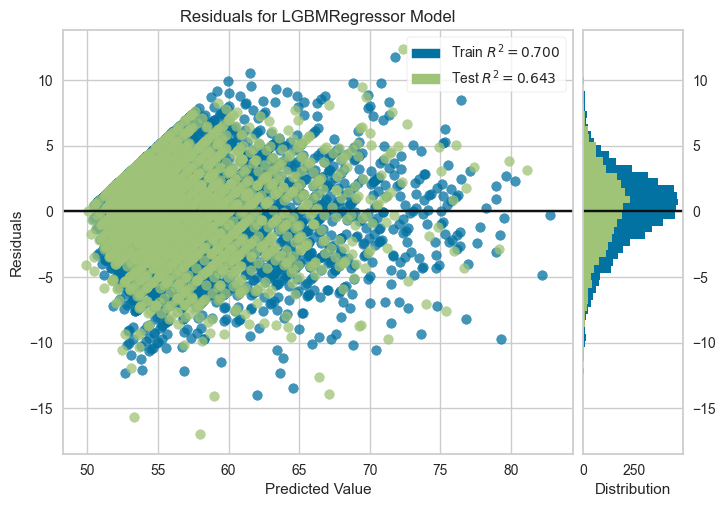

In [52]:
plot_model(tuned_LGBM)

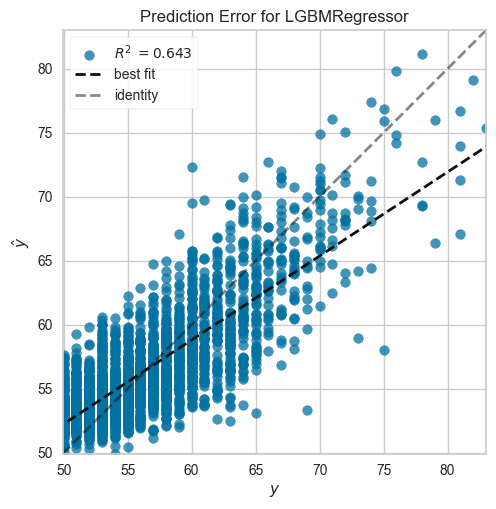

In [53]:
plot_model(tuned_LGBM, plot='error')

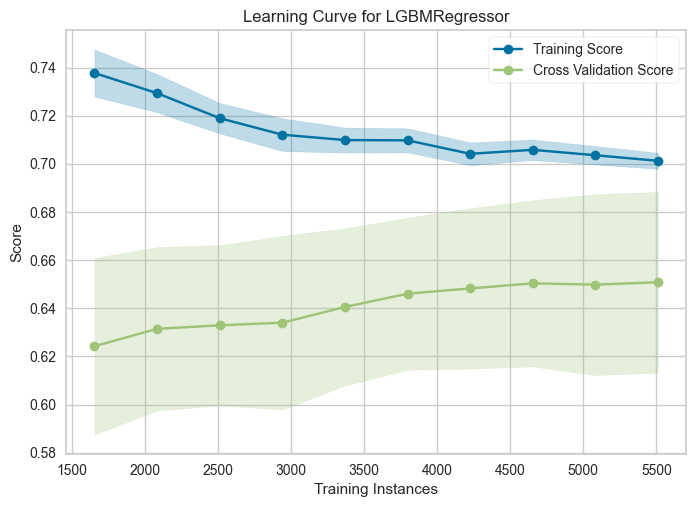

In [54]:
plot_model(tuned_LGBM, plot='learning')

In [55]:
# 마지막 학습(Finalize) 시키기
# R2 0.6795
# finalize_model(): 최종 모델로 설정 후 마지막 학습 진행
# predict_model(): 예측 결과를 'Label' 변수에 저장
final_model = finalize_model(tuned_LGBM)
pred = predict_model(final_model, data = X_test)
pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.3392,8.9842,2.9974,0.6783,0.0510,0.0410


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


,player_age,passing,bravery,anticipation,teamwork,stamina,technique,concentration,work-rate,composure,player_overall,prediction_label
952,-0.466162,-0.108389,-0.246302,0.025248,0.811312,1.418040,0.610561,0.380342,0.661979,1.079373,63,60.844952
5657,1.319705,-0.108389,0.732862,0.025248,0.811312,0.209169,0.610561,0.380342,1.237526,0.509018,53,57.758164
2213,-0.466162,0.499170,-0.246302,0.686699,-0.823142,0.813605,1.136234,0.986313,-0.489117,-0.061338,59,58.724141
7977,-1.359096,-0.108389,-0.735884,0.025248,-0.278324,0.209169,-0.440784,-0.225629,-1.064665,-0.631693,51,52.756145
1572,-0.242929,0.499170,0.243280,0.025248,0.266494,1.418040,0.610561,-0.225629,0.661979,-0.061338,61,60.793365


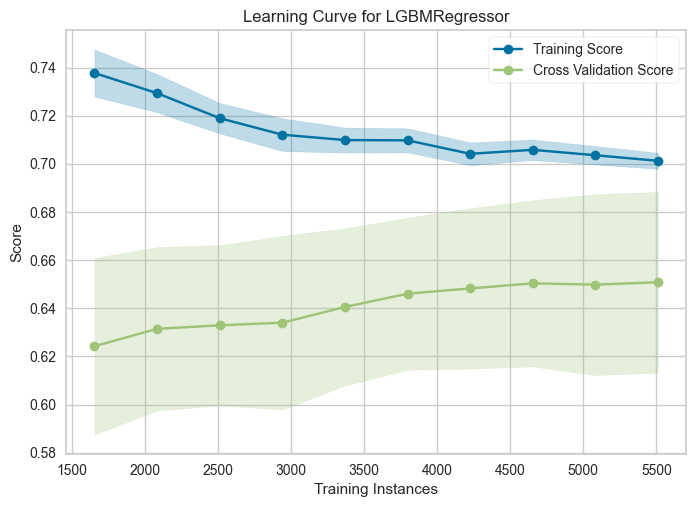

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['player_age', 'passing', 'bravery',
                                              'anticipation', 'teamwork',
                                              'stamina', 'technique',
                                              'concentration', 'work-rate',
                                              'composure'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  LGBMRegressor(bagging_fraction=0.8, bagging_freq=2,
                                feature_fraction=0.5, min_child_samples=61,
              

In [56]:
# final모델 Training Score와 Cross Validation Score 시각화
plot_model(final_model, plot='learning')

# 모델 저장
save_model(final_model, './LGBM_overall_final_model')


### Potential 예측 모델 만들기

In [57]:
DC_df = pd.read_csv('UNGK_DC.csv', encoding='utf-16', index_col=0)

In [58]:
# nongk['player_foot'] 양발은 왼발에 포함, 오른발을 1로 왼발을 2로 바꾸기
DC_df['player_foot'] = DC_df['player_foot'].replace('Both', 'Left')
DC_df['player_foot'] = DC_df['player_foot'].replace('Right', 1)
DC_df['player_foot'] = DC_df['player_foot'].replace('Left', 2)
DC_df.reset_index(drop=True, inplace=True)

In [59]:
DC_df = DC_df.drop(['player_nm', 'player_team', 'player_country', 'player_position', 'player_foot'], axis=1)


In [60]:
corr_matrix = DC_df.corr()
relevant_rows = corr_matrix[corr_matrix['player_potential'] >= 0.3]
#상관 관계값을 기준으로 내림차순 정렬
sorted_relevant_rows = relevant_rows.sort_values(by='player_potential', ascending=False)

#결과 출력
print(sorted_relevant_rows[['player_potential']])

                  player_potential
player_potential          1.000000
player_overall            0.770152
passing                   0.383792
composure                 0.371806
anticipation              0.362661
technique                 0.355541
first-touch               0.342098
teamwork                  0.324563
vision                    0.317187
bravery                   0.314831


In [61]:
DC = pd.DataFrame(DC_df[['player_age','passing', 'bravery', 'anticipation','teamwork', 'stamina', 'technique', 'concentration', 'work-rate','composure']])
DC.reset_index(drop=True, inplace=True)

In [62]:
ss = StandardScaler()
ss_DC_fit = ss.fit(DC)
ss_DC = ss_DC_fit.transform(DC)
ss_DC = pd.DataFrame(ss_DC, columns=DC.columns)
ss_DC

,player_age,passing,bravery,anticipation,teamwork,stamina,technique,concentration,work-rate,composure
0,1.096472,2.929407,1.222444,2.671049,1.900948,1.418040,2.713253,2.804227,1.237526,3.360795
1,-0.242929,1.714289,2.691190,3.332500,1.900948,3.231347,1.136234,2.198256,2.388622,2.220084
2,-0.689396,-0.108389,2.691190,2.671049,1.356130,2.022476,0.610561,3.410198,2.388622,2.220084
3,0.426771,2.929407,2.201608,2.671049,1.900948,2.022476,2.713253,2.804227,2.388622,3.931151
4,-0.466162,1.714289,1.712026,2.671049,0.811312,2.022476,0.610561,0.986313,1.813074,1.079373
...,...,...,...,...,...,...,...,...,...,...
8745,0.650005,-0.715948,-1.225466,0.686699,-1.367961,-1.604137,0.084889,-0.831600,-1.640213,-0.061338
8746,-0.242929,-0.108389,-1.715047,-0.636202,-0.823142,0.209169,0.610561,-0.831600,-0.489117,0.509018
8747,-1.359096,-0.715948,-1.715047,0.025248,-0.278324,-0.395266,0.610561,-0.225629,-0.489117,-0.061338
8748,-1.135863,-0.715948,-2.204629,-0.636202,0.811312,-0.395266,-1.492130,-0.831600,0.086431,-0.061338


In [63]:
# 머신러닝인 pycaret으로 player_overall값을 예측하기 위해 타겟값인 실제 player_overall값을 ss_DC 데이터프레임에 붙여줌
ss_DC['player_potential'] = DC_df['player_potential']
# pycaret을 이용해서 최적의 모델 구하기
X_train, X_test = train_test_split(ss_DC, train_size = 0.7, random_state =123)
potential_df = setup(data = X_train, target = 'player_potential',test_data = X_test, session_id = 123)

,Description,Value
0,Session id,123
1,Target,player_potential
2,Target type,Regression
3,Original data shape,"(8750, 11)"
4,Transformed data shape,"(8750, 11)"
5,Transformed train set shape,"(6125, 11)"
6,Transformed test set shape,"(2625, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [64]:
best = compare_models(n_select=30, sort='RMSE')
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3447,18.6951,4.3208,0.5320,0.0678,0.0537,0.1460
gbr,Gradient Boosting Regressor,3.3695,18.8344,4.3370,0.5283,0.0681,0.0541,0.0580
rf,Random Forest Regressor,3.4129,19.4987,4.4117,0.5122,0.0692,0.0548,0.2110
et,Extra Trees Regressor,3.4272,19.5220,4.4150,0.5115,0.0692,0.0551,0.2000
knn,K Neighbors Regressor,3.7037,22.4939,4.7393,0.4369,0.0743,0.0593,0.0190
br,Bayesian Ridge,3.8059,23.1298,4.8079,0.4204,0.0755,0.0612,0.0050
ridge,Ridge Regression,3.8061,23.1301,4.8080,0.4204,0.0755,0.0612,0.0050
lar,Least Angle Regression,3.8061,23.1302,4.8080,0.4204,0.0755,0.0612,0.0060
lr,Linear Regression,3.8061,23.1302,4.8080,0.4204,0.0755,0.0612,0.0050
huber,Huber Regressor,3.7999,23.1976,4.8149,0.4187,0.0754,0.0608,0.0070


[LGBMRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 KNeighborsRegressor(n_jobs=-1)]

In [65]:
# 모델 생성하기
GBR = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4304,18.6273,4.3159,0.5762,0.0672,0.0548
1,3.5112,20.7745,4.5579,0.4816,0.0714,0.0561
2,3.3311,18.3924,4.2886,0.5102,0.0665,0.0533
3,3.3900,18.4303,4.2931,0.4874,0.0670,0.0545
4,3.4055,19.1242,4.3731,0.5160,0.0675,0.0541
5,3.3140,18.6282,4.3160,0.5548,0.0670,0.0527
6,3.5941,21.6326,4.6511,0.5160,0.0777,0.0593
7,3.2980,18.2766,4.2751,0.5118,0.0667,0.0531
8,3.2998,18.1441,4.2596,0.5499,0.0665,0.0528


In [66]:
# 모델 튜닝
tuned_GBR = tune_model(GBR, optimize = 'RMSE', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3645,18.2096,4.2673,0.5857,0.0665,0.0538
1,3.4777,20.3245,4.5083,0.4928,0.0706,0.0556
2,3.2803,17.5943,4.1946,0.5314,0.0652,0.0525
3,3.3418,17.7556,4.2137,0.5062,0.0659,0.0537
4,3.4192,19.1661,4.3779,0.5149,0.0677,0.0543
5,3.3678,19.2944,4.3925,0.5389,0.0681,0.0535
6,3.5759,21.5767,4.6451,0.5173,0.0772,0.0589
7,3.2213,17.4255,4.1744,0.5346,0.0654,0.0519
8,3.2626,17.8057,4.2197,0.5583,0.0659,0.0524


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


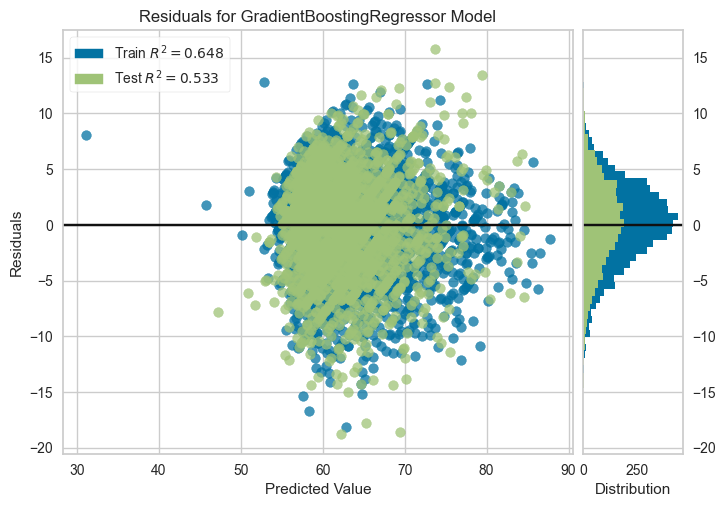

In [67]:
plot_model(tuned_GBR)

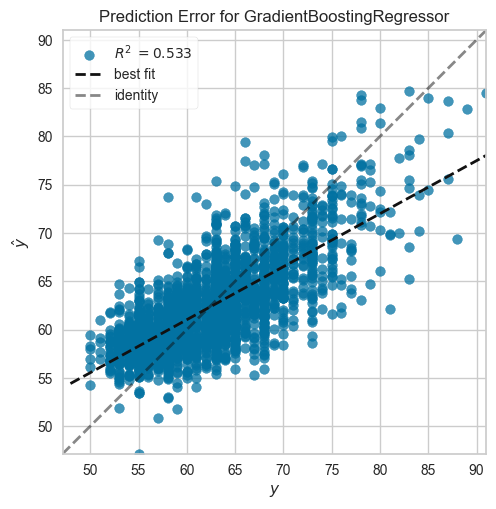

In [68]:
plot_model(tuned_GBR, plot='error')

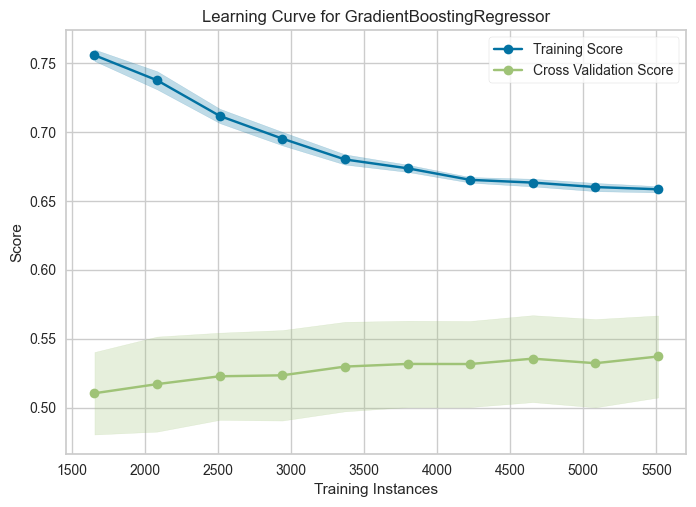

In [69]:
plot_model(tuned_GBR, plot='learning')

In [70]:
# 마지막 학습(Finalize) 시키기
# R2 0.6211
# finalize_model(): 최종 모델로 설정 후 마지막 학습 진행
# predict_model(): 예측 결과를 'Label' 변수에 저장
final_model = finalize_model(tuned_GBR)
pred = predict_model(final_model, data = X_test)
pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.9351,14.0350,3.7463,0.6221,0.0588,0.0472


,player_age,passing,bravery,anticipation,teamwork,stamina,technique,concentration,work-rate,composure,player_potential,prediction_label
952,-0.466162,-0.108389,-0.246302,0.025248,0.811312,1.418040,0.610561,0.380342,0.661979,1.079373,74.0,65.446403
5657,1.319705,-0.108389,0.732862,0.025248,0.811312,0.209169,0.610561,0.380342,1.237526,0.509018,63.0,63.157692
2213,-0.466162,0.499170,-0.246302,0.686699,-0.823142,0.813605,1.136234,0.986313,-0.489117,-0.061338,65.0,64.278352
7977,-1.359096,-0.108389,-0.735884,0.025248,-0.278324,0.209169,-0.440784,-0.225629,-1.064665,-0.631693,63.0,63.343006
1572,-0.242929,0.499170,0.243280,0.025248,0.266494,1.418040,0.610561,-0.225629,0.661979,-0.061338,63.0,65.138613


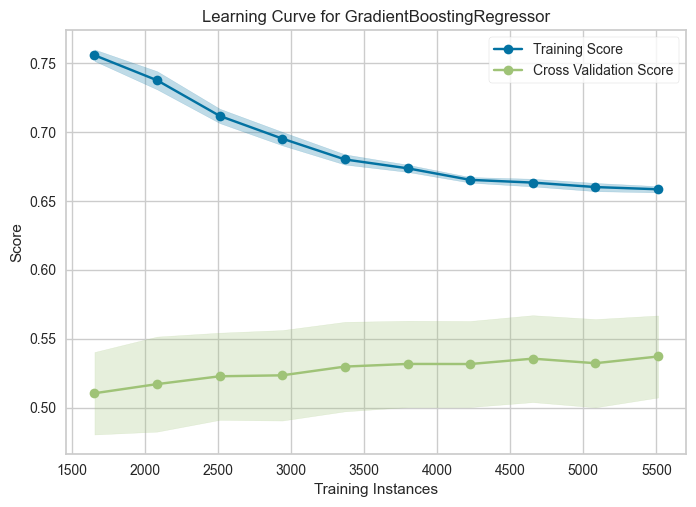

In [71]:

# final모델 Training Score와 Cross Validation Score 시각화
plot_model(final_model, plot='learning')


In [72]:

# 모델 저장
save_model(final_model, './GBR_potential_final_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['player_age', 'passing', 'bravery',
                                              'anticipation', 'teamwork',
                                              'stamina', 'technique',
                                              'concentration', 'work-rate',
                                              'composure'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                            max_features='sqrt',
                  